In [8]:
import open3d as o3d
import numpy as np
import os

def load_point_cloud_from_ply(file_path):
    """
    Load a point cloud from a .ply file.
    """
    return o3d.io.read_point_cloud(file_path)

def stitch_point_clouds(files):
    """
    Stitch multiple point clouds into one complete point cloud.
    Assumes files are sequential point clouds.
    """
    stitched_cloud = None
    
    for file in files:
        print(f"Loading {file}...")
        pc = load_point_cloud_from_ply(file)
        
        if stitched_cloud is None:
            stitched_cloud = pc
        else:
            # Apply a simple transformation (translation) to each point cloud
            # transformation = np.eye(4)
            # transformation[:3, 3] = np.array([1, 0, 0])  # Shift all points along x-axis (example)

            # transformation=[
            #     [1, -6.66133815e-16, 5.55111512e-16, -5.08009972e-15],
            #     [6.38378239e-16, 1, -7.21644966e-16, -2.41203338e-15],
            #     [-5.55111512e-16, 9.43689571e-16, 1, -7.21325302e-15],
            #     [0, 0, 0, 1]
            # ]
            # transformation=[[ 1.00000000e+00, -1.11022302e-15, 9.43689571e-16, -1.31804748e-16],
            #                 [ 3.60822483e-16,  1.00000000e+00, -5.55111512e-16, -1.73243214e-16],
            #                 [-5.55111512e-16,  6.66133815e-16,  1.00000000e+00, -8.35367888e-16],
            #                 [0, 0, 0, 1]]
            '''
            Expected rotation: 
            [[ 0.99692656  0.06687358 -0.04066644]
            [-0.06612899  0.99761788  0.01940087]
            [ 0.04186755 -0.01665178  0.99897777]]
            Estimated rotation: 
            [[ 1.00000000e+00  5.55111512e-16 -3.88578059e-16]
            [-4.99600361e-16  1.00000000e+00  5.82867088e-16]
            [ 7.21644966e-16 -4.99600361e-16  1.00000000e+00]]
            Error (rad): 
            0.08050650809480826
            Expected translation: 
            [-0.11557694 -0.03877054  0.11487489]
            Estimated translation: 
            [-4.90752127e-16 -5.78501538e-16 -8.00931274e-16]
            Error (m): 
            0.16750350425440427
            Number of correspondences:  3361
            Number of outliers:  1700
            Time taken (s):  1.7570295333862305
            '''

            # Create transformation matrix from estimated rotation and translation
            estimated_rotation = np.array([
                [1.00000000e+00,  5.55111512e-16, -3.88578059e-16],
                [-4.99600361e-16,  1.00000000e+00,  5.82867088e-16],
                [7.21644966e-16, -4.99600361e-16,  1.00000000e+00]
            ])
            estimated_translation = np.array([-4.90752127e-16, -5.78501538e-16, -8.00931274e-16])

            transformation = np.eye(4)
            transformation[:3, :3] = estimated_rotation
            transformation[:3, 3] = estimated_translation

            pc.transform(transformation)
            stitched_cloud += pc
    
    return stitched_cloud

def main(directory):
    # List all .ply files (assuming each represents a point cloud)
    pointcloud_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.ply')]
    pointcloud_files.sort()  # Optional: sort by filename if the order is important

    # Stitch point clouds
    stitched_cloud = stitch_point_clouds(pointcloud_files[:10])

    # Visualize the result
    o3d.visualization.draw_geometries([stitched_cloud])

    # Optionally save the stitched point cloud
    o3d.io.write_point_cloud("strawberry_stitched_segmented_point_cloud.ply", stitched_cloud)

if __name__ == "__main__":
    # main("D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud")
    main("D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\segmented_pointcloud")

Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud\pointcloud_0000.ply...
Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud\pointcloud_0001.ply...
Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud\pointcloud_0002.ply...
Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud\pointcloud_0003.ply...
Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud\pointcloud_0004.ply...
Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\strawberry_extracted_pointcloud\pointcloud_0005.ply...
Loading D:\Malak Doc\Malak Education\MBZUAI\Academic years\Sprin

# Visualizing stitched pointcloud .ply

In [1]:
import open3d as o3d

# Load the point cloud from the .ply file
point_cloud = o3d.io.read_point_cloud(r"D:\Malak Doc\Malak Education\MBZUAI\Academic years\Spring 2025\CV703\project\Intel Realsense\chair_stitched_point_cloud.ply")

# Visualize the point cloud
o3d.visualization.draw_geometries([point_cloud])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


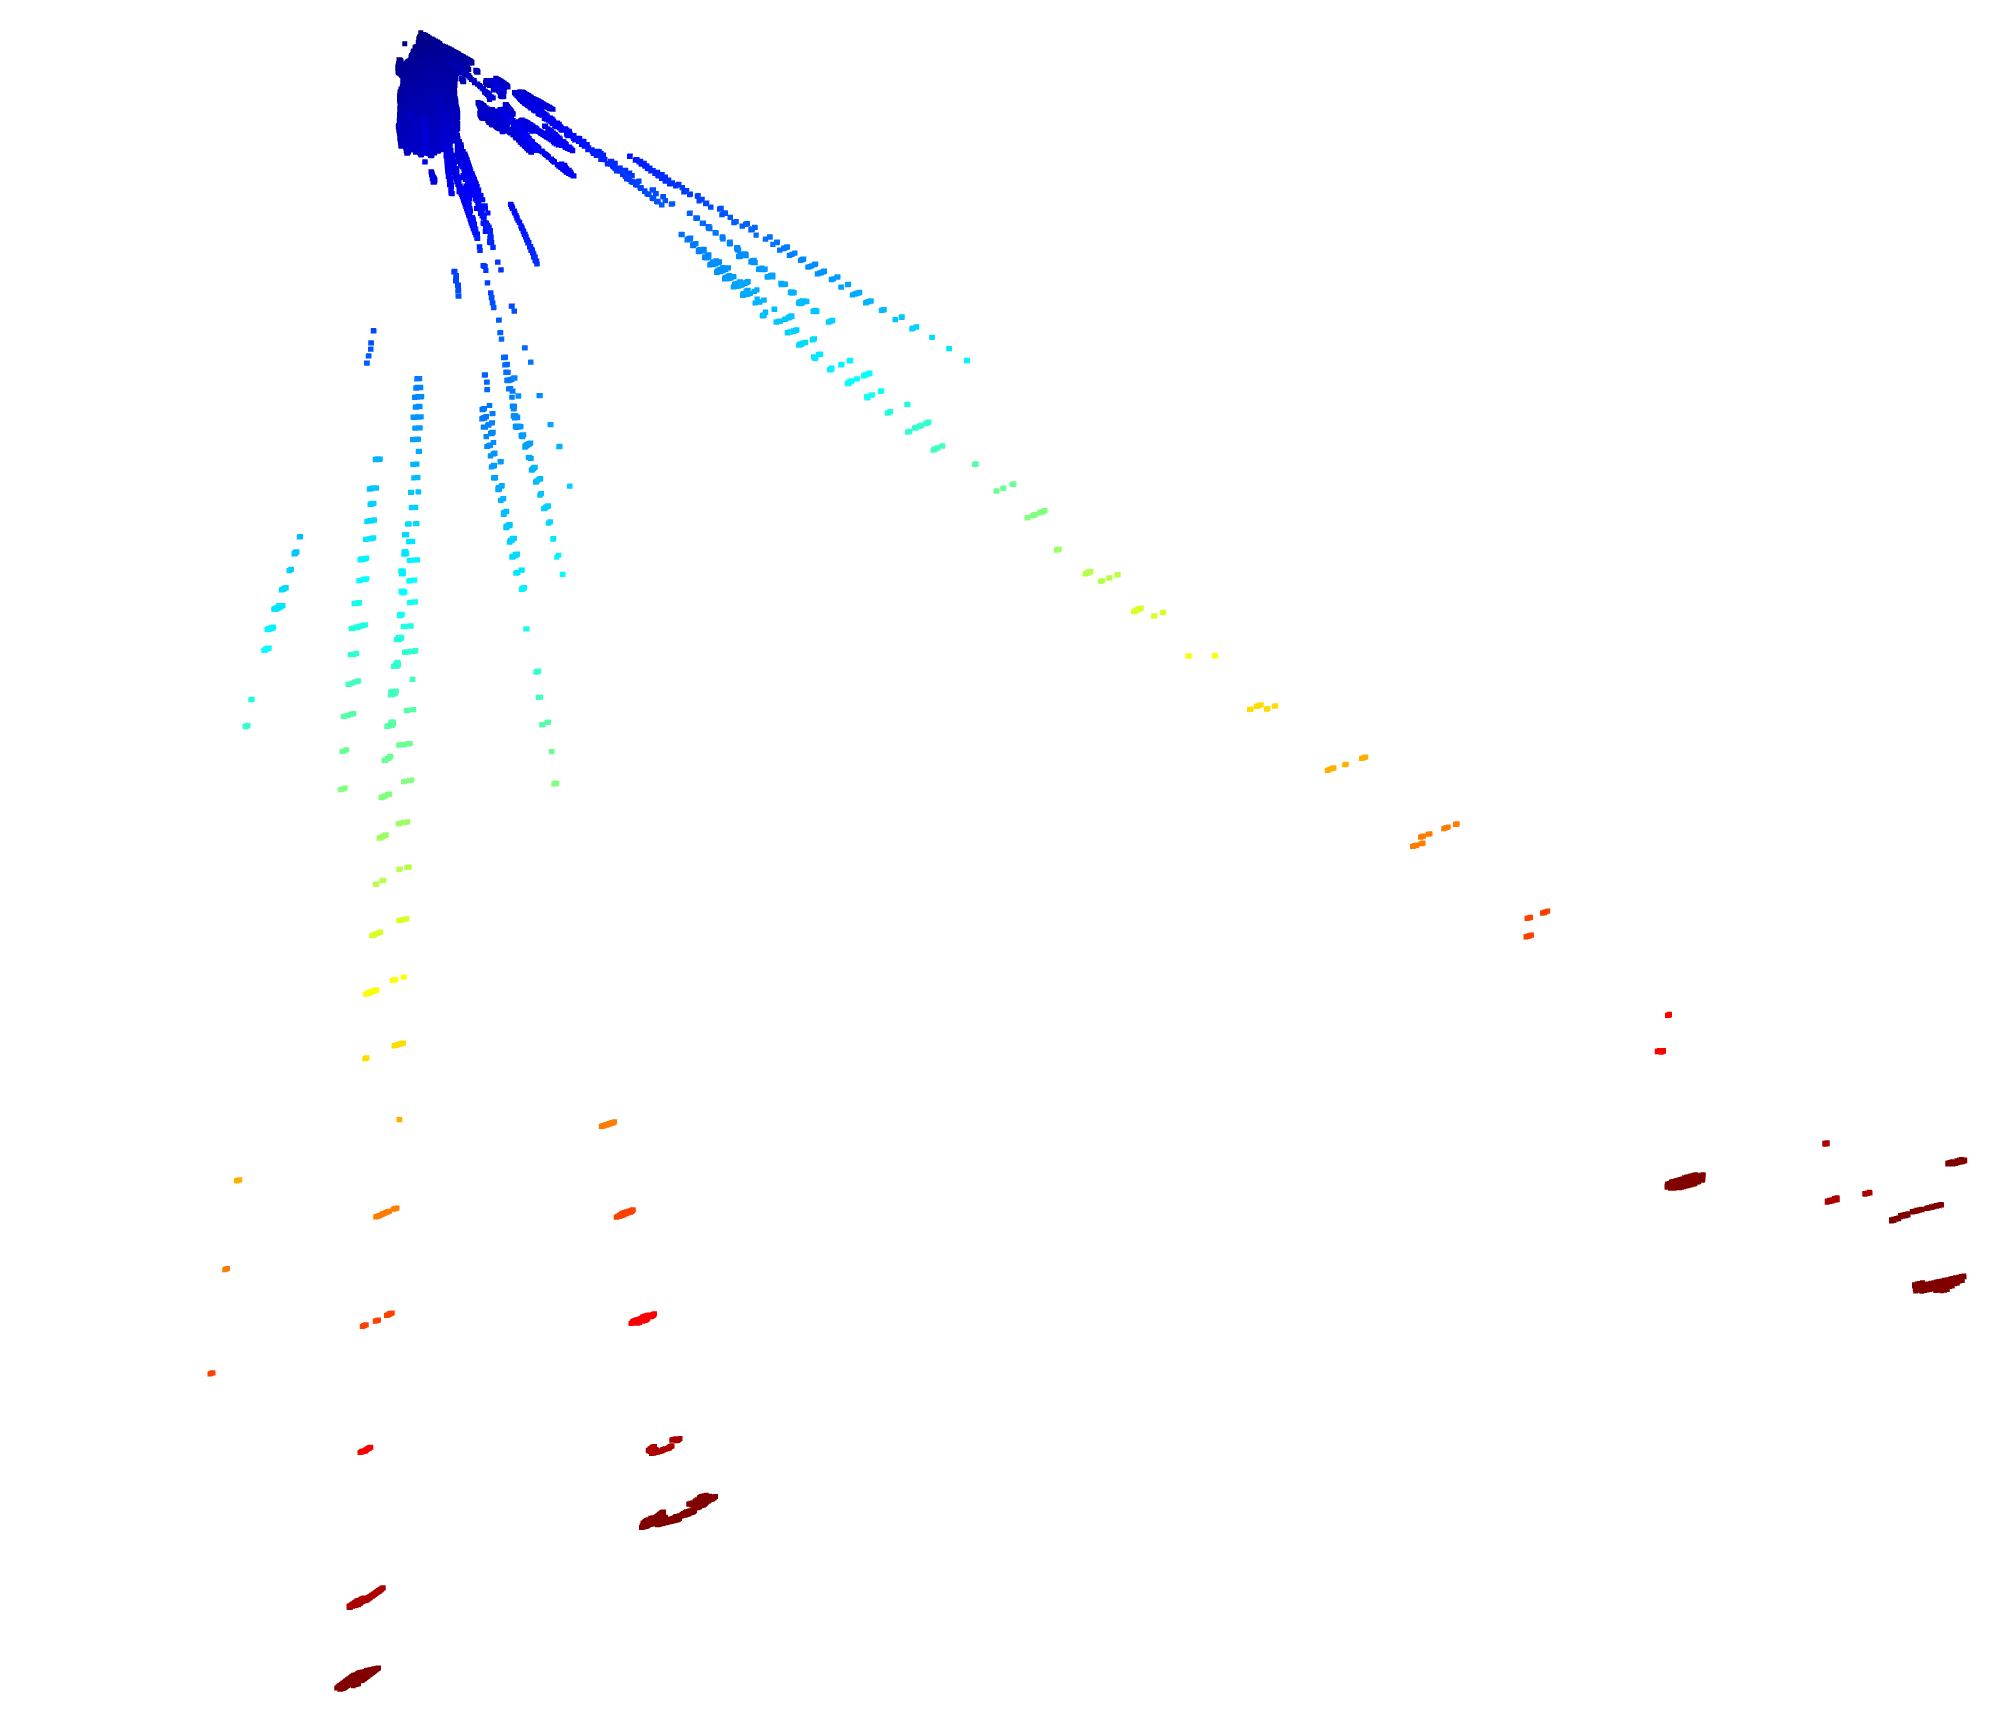

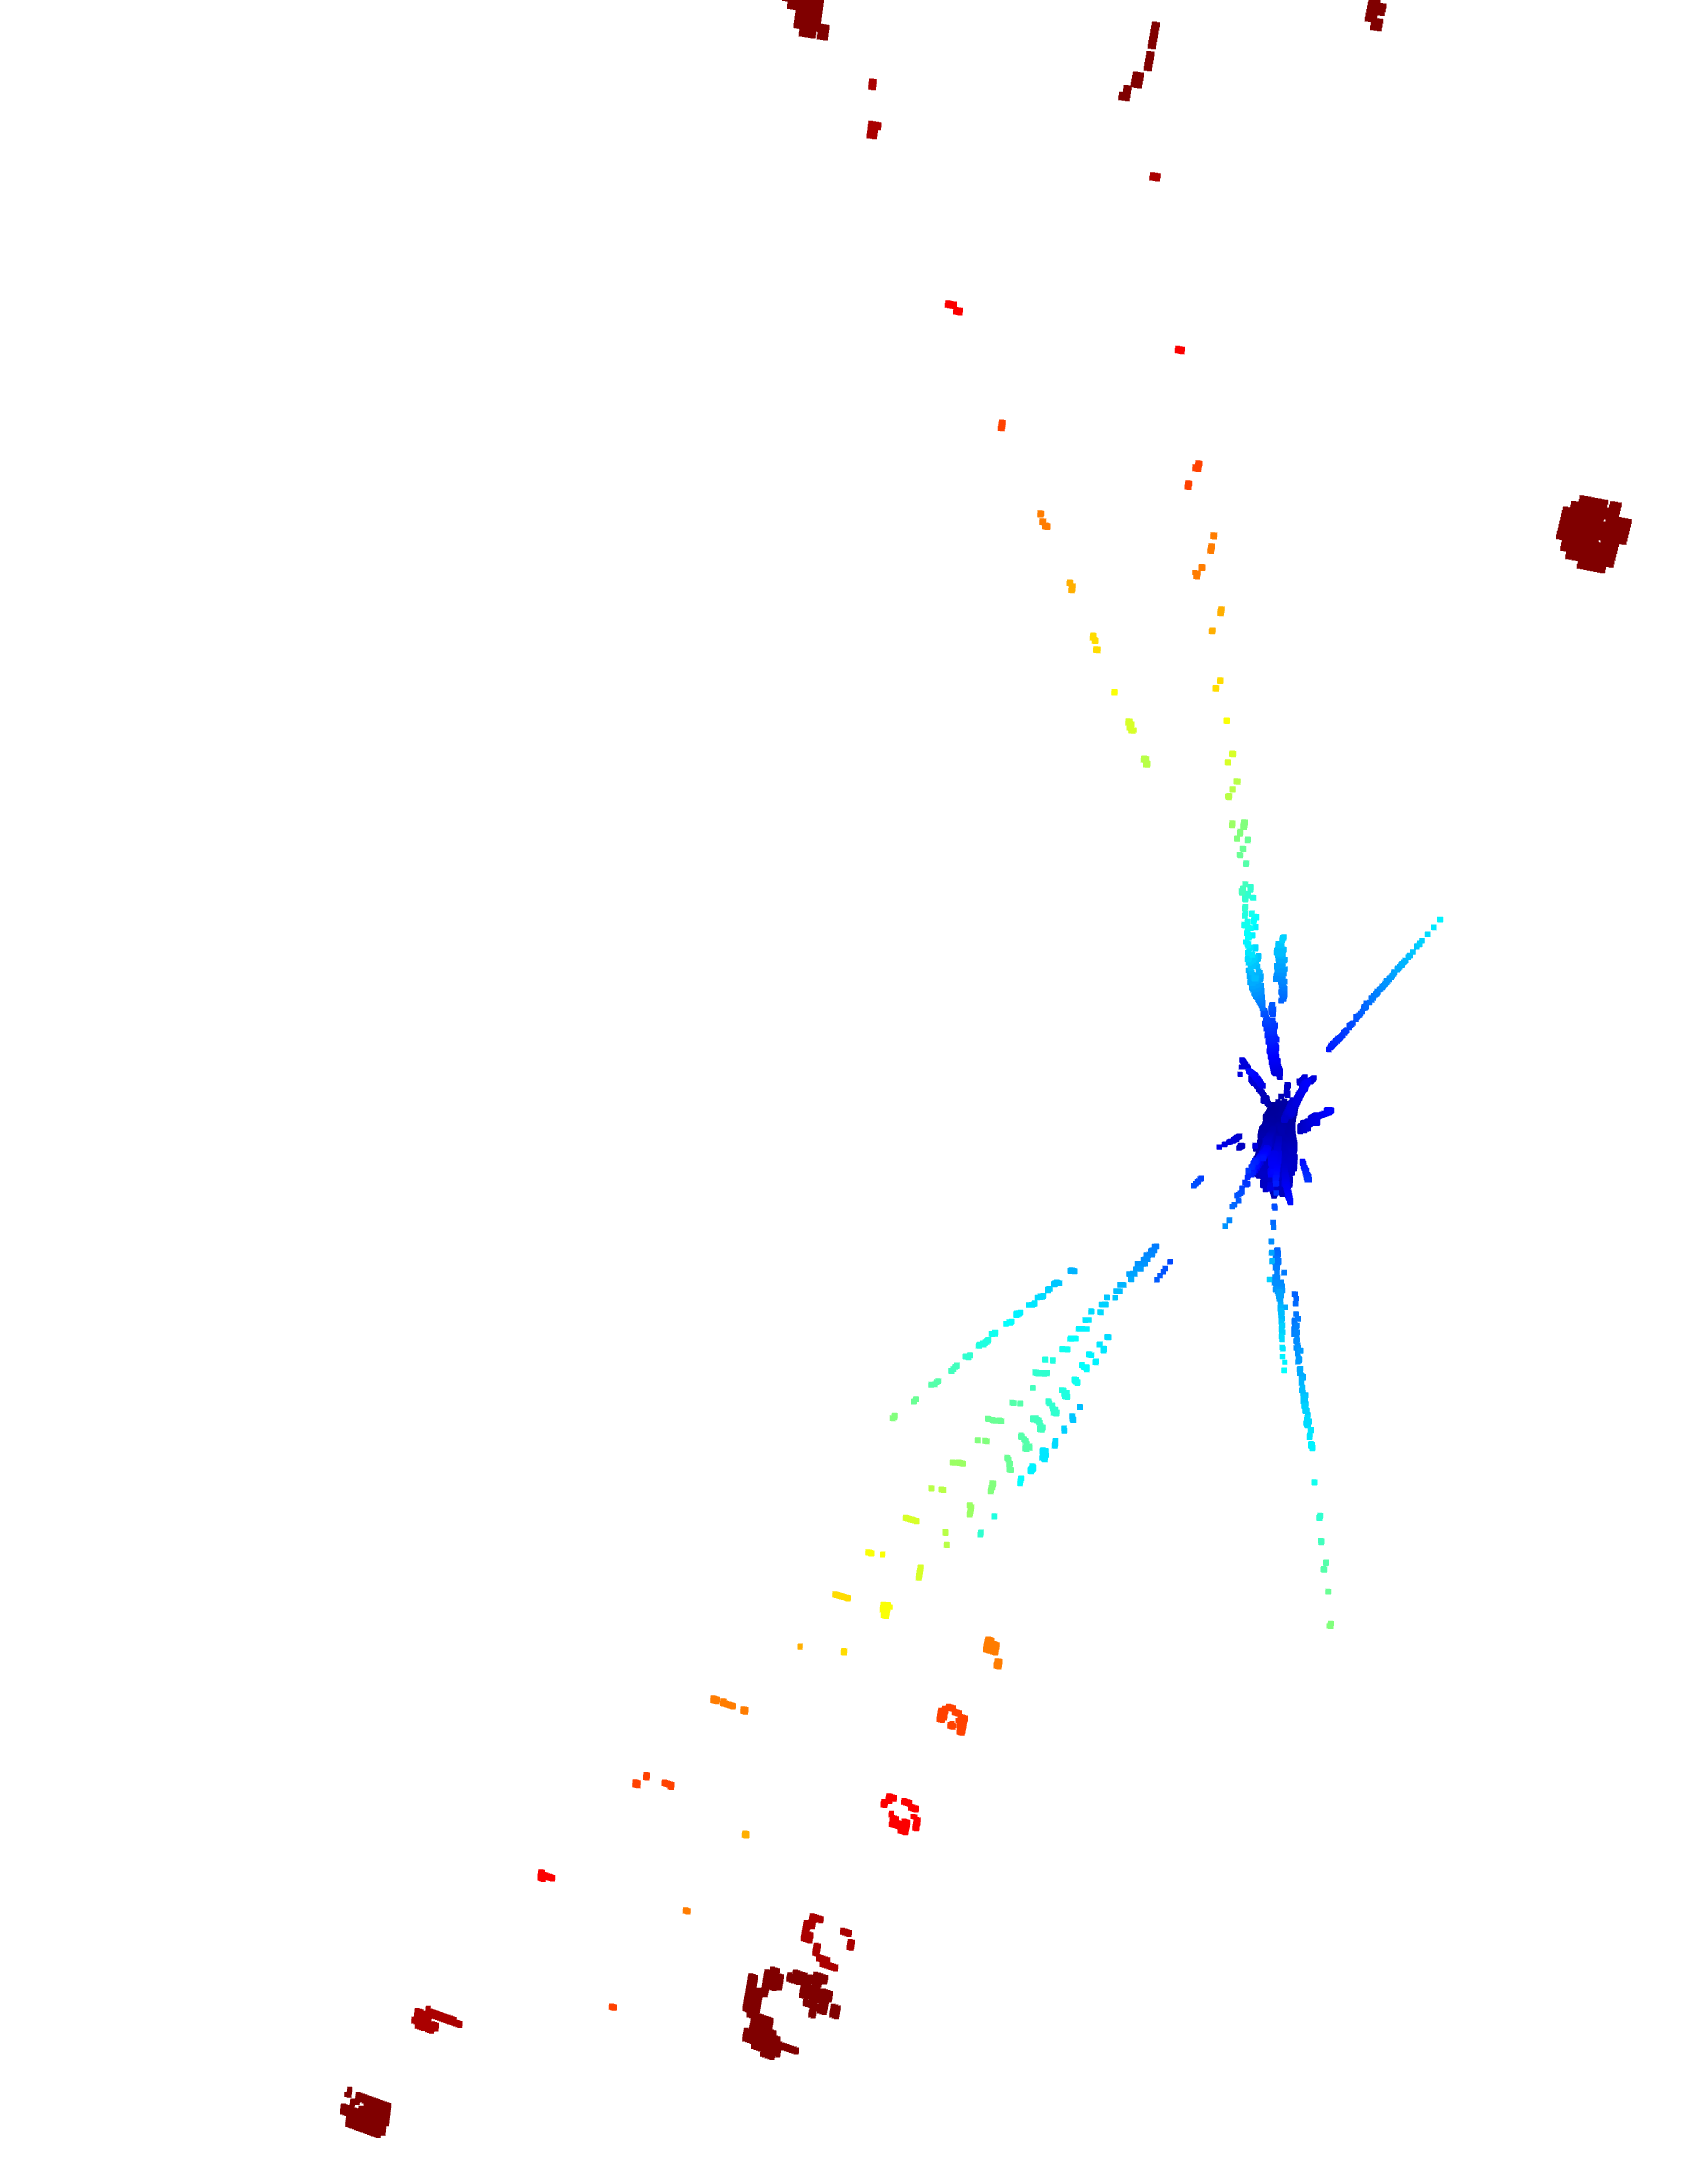

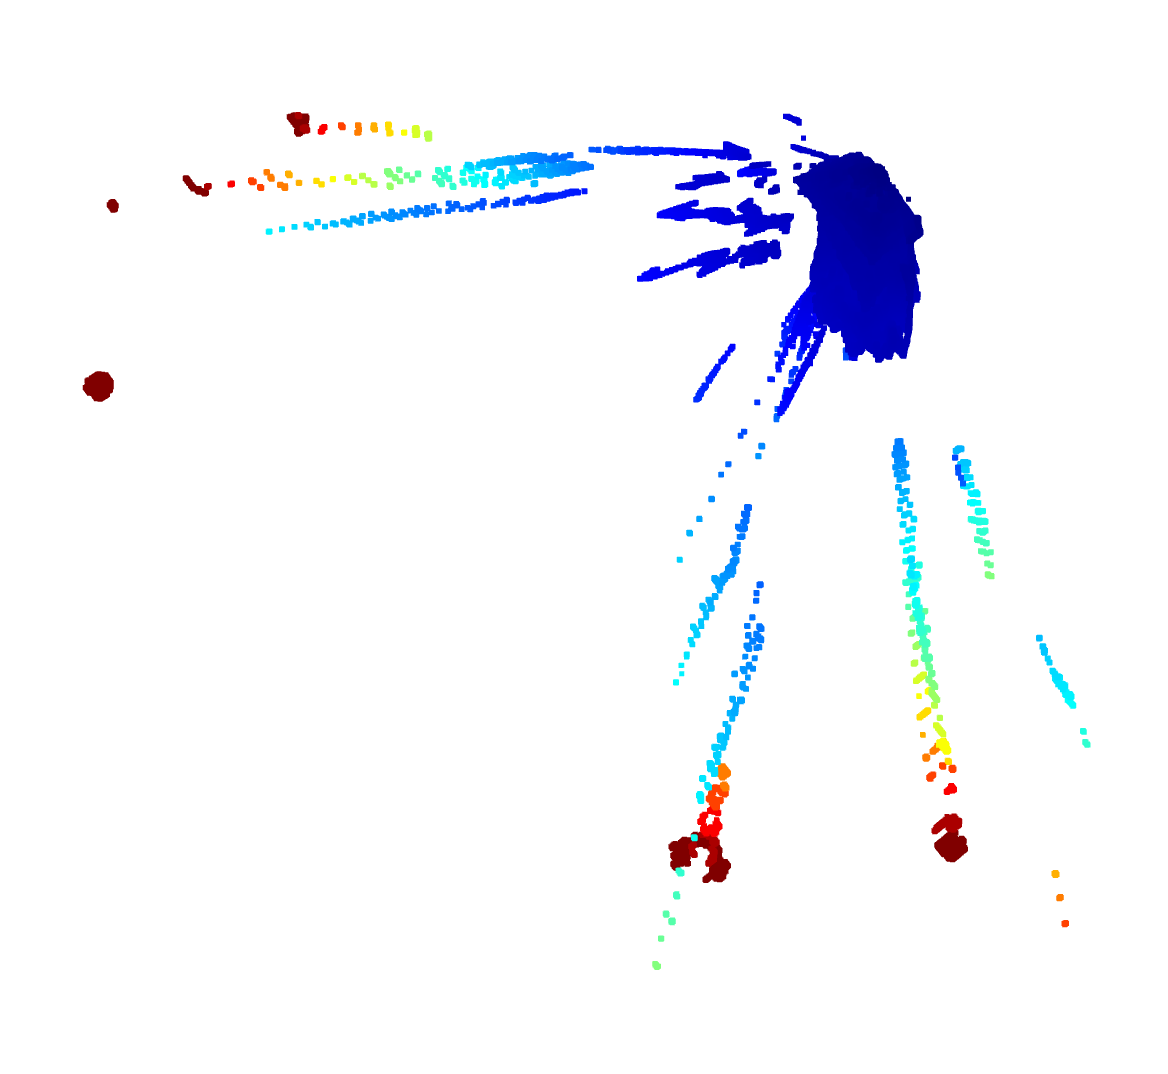

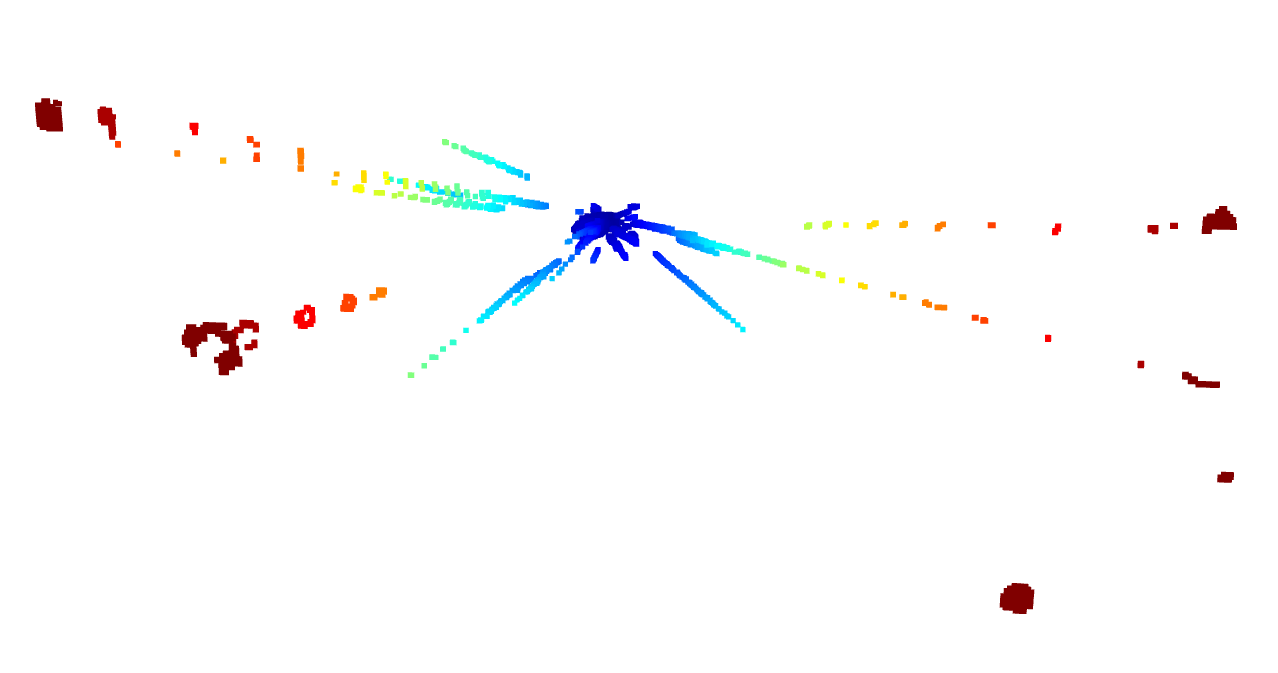